In [3]:
import pandas as pd

# File paths (Update these with actual file locations if running locally)
netflix_file = "C:/Users/nehit/OneDrive/Desktop/movies & shows/netflix_titles.csv/netflix_titles.csv"
disney_file = "C:/Users/nehit/OneDrive/Desktop/movies & shows/disney_plus_titles.csv"
amazon_file = "C:/Users/nehit/OneDrive/Desktop/movies & shows/amazon_prime_titles.csv/amazon_prime_titles.csv"

# Load datasets
netflix_df = pd.read_csv(netflix_file)
disney_df = pd.read_csv(disney_file)
amazon_df = pd.read_csv(amazon_file)

# Add OTT Platform column
netflix_df["Platform"] = "Netflix"
disney_df["Platform"] = "Disney+"
amazon_df["Platform"] = "Amazon Prime"

# Merge all datasets into one
merged_df = pd.concat([netflix_df, disney_df, amazon_df], ignore_index=True)

# Save merged dataset
merged_df.to_csv("Merged_OTT_Titles.csv", index=False)

print("✅ Merging complete! Data saved as 'Merged_OTT_Titles.csv'")

# Display the first few rows
print(merged_df.head())


✅ Merging complete! Data saved as 'Merged_OTT_Titles.csv'
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021       

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load the CSV file
df = pd.read_csv("Merged_OTT_Titles.csv")

# Display basic information about the dataset
df.info()
df.head()













<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19925 entries, 0 to 19924
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       19925 non-null  object
 1   type          19925 non-null  object
 2   title         19925 non-null  object
 3   director      14736 non-null  object
 4   cast          17677 non-null  object
 5   country       9879 non-null   object
 6   date_added    10399 non-null  object
 7   release_year  19925 non-null  int64 
 8   rating        19581 non-null  object
 9   duration      19922 non-null  object
 10  listed_in     19925 non-null  object
 11  description   19925 non-null  object
 12  Platform      19925 non-null  object
dtypes: int64(1), object(12)
memory usage: 2.0+ MB


show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description Platform  
0  As her father nears the end of his life, filmm...  Netflix  
1  After crossing paths at a party, a Cape Town t...  Netflix  
2  To protect his family from a powerful drug lor...  Netflix  
3  Feuds, flirtations and toilet talk go down amo...  Netflix  
4  In a city of coaching centers known to train I...  Netflix

In [60]:
# Data Cleaning
# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Handle missing values
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)
df['rating'].fillna('Unknown', inplace=True)


In [63]:
# Standardizing Ratings
def standardize_rating(rating):
    rating_mapping = {
        "Kids": ["G", "TV-Y", "TV-Y7", "TV-G", "ALL", "TV-Y7-FV", "ALL_AGES"],
        "Teens": ["PG", "TV-PG", "PG-13", "TV-14", "7+", "13+", "TV-NR", "TV-Y7", "16+", "16", "AGES_16_", "NOT_RATE", "Mature"],
        "Adults": ["R", "TV-MA", "NC-17", "18+", "NR", "UR", "UNRATED", "AGES_18_"]
    }
    for category, values in rating_mapping.items():
        if rating in values:
            return category
    return "Unknown"


df['standardized_rating'] = df['rating'].apply(standardize_rating)


In [65]:
# Removing rows with specific durations to be deleted
df = df[~df['rating'].astype(str).str.contains("66 min|84 min|74 min", na=False)]


In [67]:
# Save the cleaned dataset
cleaned_file_path = "C:/Users/nehit/Cleaned_OTT_Titles5.csv"
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to: {cleaned_file_path}")

Cleaned data saved to: C:/Users/nehit/Cleaned_OTT_Titles5.csv


C:\Users\nehit\AppData\Local\Temp\ipykernel_27996\3053622846.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="type", palette="viridis")


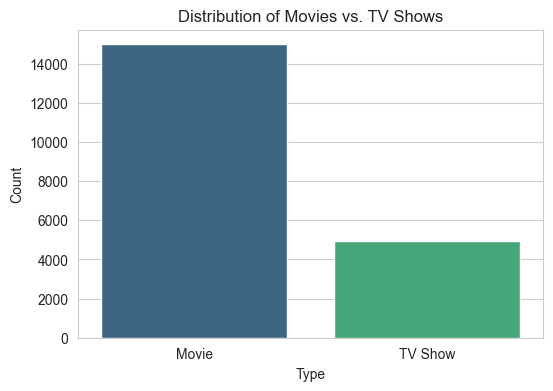

In [69]:
# Exploratory Data Analysis (EDA)
sns.set_style("whitegrid")

# 1. Distribution of Movies vs. TV Shows
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="type", palette="viridis")
plt.title("Distribution of Movies vs. TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


C:\Users\nehit\AppData\Local\Temp\ipykernel_27996\2043570941.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_df.head(10), y="Genre", x="Count", palette="plasma")


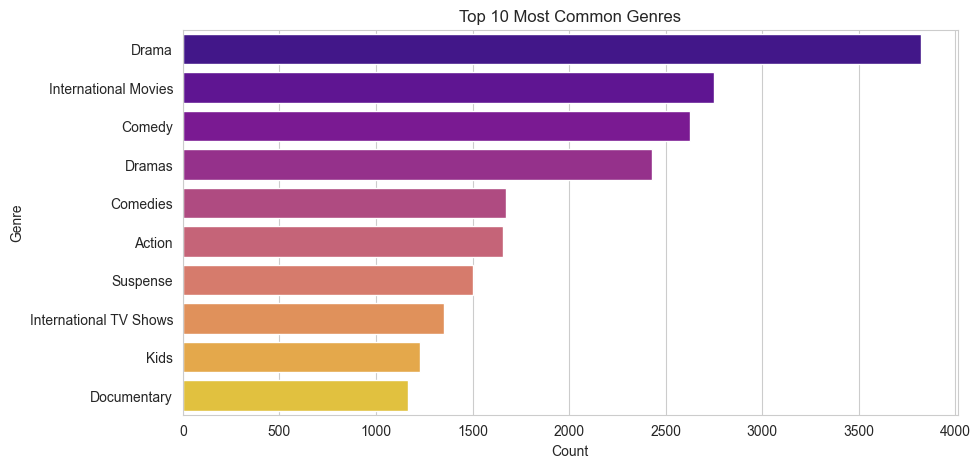

In [71]:
# 2. Most Common Genres
all_genres = df['listed_in'].str.split(', ').explode()
genre_counts = Counter(all_genres)
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=genre_df.head(10), y="Genre", x="Count", palette="plasma")
plt.title("Top 10 Most Common Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

C:\Users\nehit\AppData\Local\Temp\ipykernel_27996\3315850511.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette="magma")


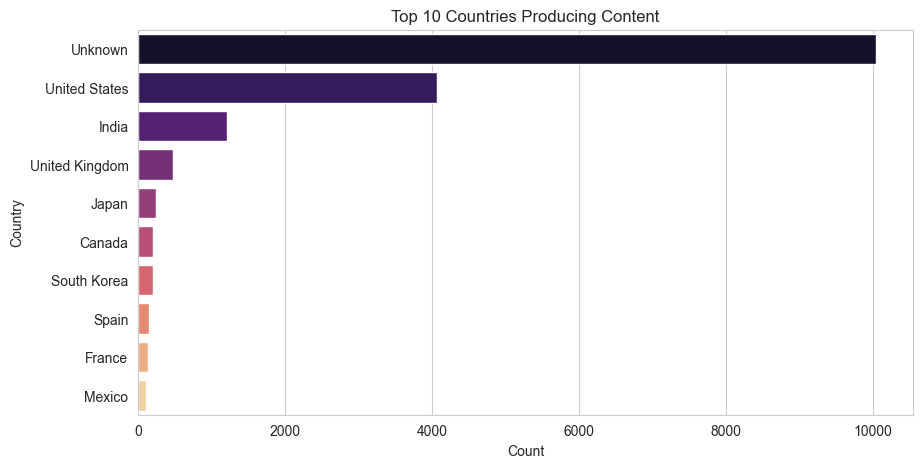

In [73]:
# 3. Top Countries Producing Content
country_counts = df['country'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=country_counts.values, y=country_counts.index, palette="magma")
plt.title("Top 10 Countries Producing Content")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()


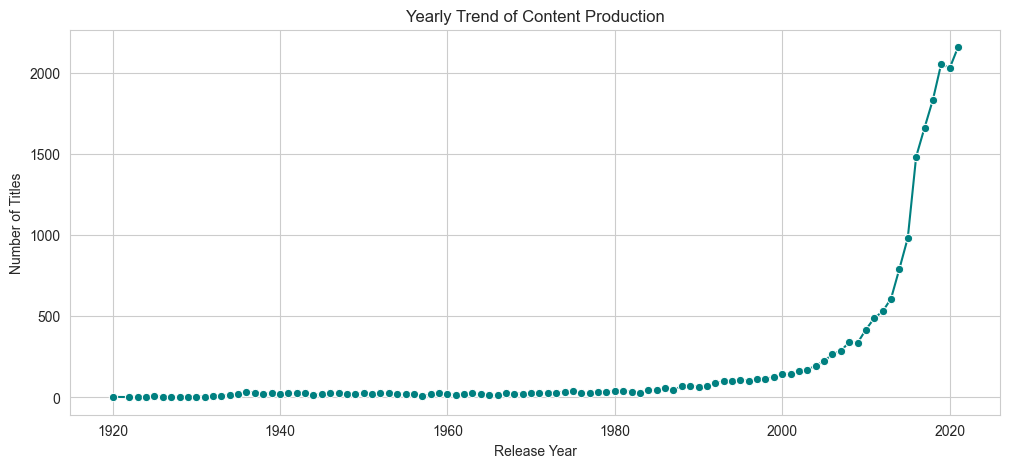

In [75]:
# 4. Yearly Trend of Content Production
yearly_trend = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker="o", color="teal")
plt.title("Yearly Trend of Content Production")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()

C:\Users\nehit\AppData\Local\Temp\ipykernel_27996\4167557075.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_counts.index, y=platform_counts.values, palette="coolwarm")


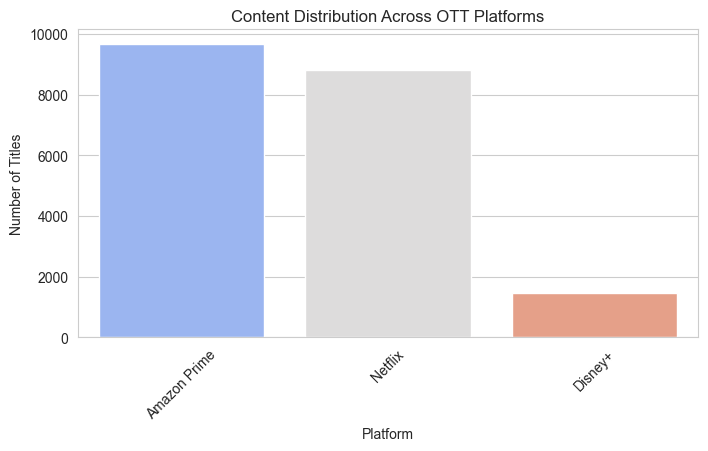

In [77]:
# 5. Content Distribution Across Platforms
platform_counts = df['Platform'].value_counts()

plt.figure(figsize=(8, 4))
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette="coolwarm")
plt.title("Content Distribution Across OTT Platforms")
plt.xlabel("Platform")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()